In [43]:
import pyroms

name = 'ob500'

grd = pyroms.grid.ROMS_Grid(name)

In [44]:
import csv
import numpy as np

csvfile = '/Users/teruhisa/Dropbox/Data/Grid/9/mesh-v5.csv'

x_rho = 117
y_rho = 124
h = np.zeros([y_rho, x_rho])

with open(csvfile, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for y, row in enumerate(reader):
        h[y_rho-y-1, :] = row[1:]

<matplotlib.colorbar.Colorbar instance at 0x110ab40e0>

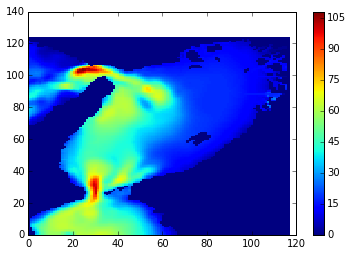

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pcolor(h)
plt.colorbar()

In [114]:
pyroms.grid.CGrid?

In [121]:
theta_b = 0
theta_s = 3
Tcline = 0.5
N = 20
vgrid = pyroms.vgrid.s_coordinate(h,  theta_b, theta_s, Tcline, N, hraw=h)

In [123]:
x, y = np.mgrid[0:(y_rho+1)*500:500, 0:(x_rho+1)*500:500]
#x = np.ma.masked_where((h<0.5), x)
#y = np.ma.masked_where((h<0.5), y)
hgrid = pyroms.hgrid.CGrid(x, y)
hgrid.x_rho

array([[   250.,    250.,    250., ...,    250.,    250.,    250.],
       [   750.,    750.,    750., ...,    750.,    750.,    750.],
       [  1250.,   1250.,   1250., ...,   1250.,   1250.,   1250.],
       ..., 
       [ 60750.,  60750.,  60750., ...,  60750.,  60750.,  60750.],
       [ 61250.,  61250.,  61250., ...,  61250.,  61250.,  61250.],
       [ 61750.,  61750.,  61750., ...,  61750.,  61750.,  61750.]])

In [130]:
for x in range(x_rho):
    index = np.where(h[:,x]<0.5)
    hgrid.mask[index,x] = 0

In [131]:
grd = pyroms.grid.ROMS_Grid(name, hgrid, vgrid)
grd.vgrid.h.shape

(124, 117)

In [125]:
grd.hgrid.x_rho.shape

(124, 117)

In [132]:
grd.hgrid.mask_rho

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [133]:
pyroms.grid.write_ROMS_grid(grd, '/Users/teruhisa/Dropbox/Data/ob500_grd-9.0.nc')

 ... wrote  theta_s
 ... wrote  theta_b
 ... wrote  Tcline
 ... wrote  hc
 ... wrote  s_rho
 ... wrote  s_w
 ... wrote  Cs_r
 ... wrote  Cs_w
 ... wrote  h
 ... wrote  hraw
 ... wrote  f
 ... wrote  pm
 ... wrote  pn
 ... wrote  dmde
 ... wrote  dndx
 ... wrote  xl
 ... wrote  el
 ... wrote  x_rho
 ... wrote  y_rho
 ... wrote  x_u
 ... wrote  y_u
 ... wrote  x_v
 ... wrote  y_v
 ... wrote  x_psi
 ... wrote  y_psi
 ... wrote  x_vert
 ... wrote  y_vert
 ... wrote  spherical
 ... wrote  angle
 ... wrote  mask_rho
 ... wrote  mask_u
 ... wrote  mask_v
 ... wrote  mask_psi


In [64]:
grd.hgrid.mask